In [1]:
import os
import random
import warnings
from IPython.display import display, HTML

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

from auto_categorical_features_transformer import create_categorical_feature_transformations_report, CategoricalTransformationMethods

In [2]:
warnings.filterwarnings("ignore")

In [3]:
def _load_bank_marketing_dataset(full: bool = False):
    from pathlib import Path
    dataset_path = Path('./datasets/bank') / ('bank-full.csv' if full else 'bank.csv')
    bank_df = pd.read_csv(dataset_path, delimiter=';')
    y = (bank_df['y'] == 'yes').astype(int)
    X = bank_df.drop(columns=['y'])
    return X, y

In [4]:
X, y = _load_bank_marketing_dataset()

transformations evaluation: 100%|████████████████████████████████████████████████████████████████| 4096/4096 [1:25:21<00:00,  1.25s/it]


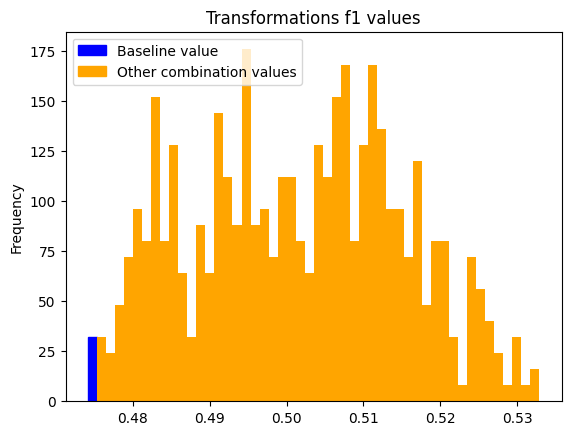

In [5]:
woe_results = create_categorical_feature_transformations_report(
    X, y,
    transformation_method=CategoricalTransformationMethods.WeightOfEvidence,
    return_rich_table=True,
    verbose=True
)
woe_results.summary_table